**MULTI CLASSIFICATION WITH PYTORCH**

*DATASETS : sklearn.datasets.load_iris*

In [1]:
! pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 4.2 MB/s eta 0:00:00


In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import torch
from torch import nn
import torchmetrics as tm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
iris = load_iris()
x = iris.data
y = iris.target
print(x[:5])
print(y[:5])
x.shape , y.shape

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


((150, 4), (150,))

In [4]:
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.LongTensor)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

(torch.Size([120, 4]),
 torch.Size([120]),
 torch.Size([30, 4]),
 torch.Size([30]))

In [5]:
class MultiClassificationModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=4,out_features=8)
        self.linear2 = nn.Linear(in_features=8,out_features=8)
        self.linear3 = nn.Linear(in_features=8,out_features=3)
        self.relu = nn.ReLU()

    def forward(self,x:torch.Tensor) -> torch.Tensor :
        layer1 = self.linear1(x)
        layer2 = self.linear2(self.relu(layer1))
        layer3 = self.linear3(self.relu(layer2))
        return layer3

In [6]:
model = MultiClassificationModelV0()
print(model)

MultiClassificationModelV0(
  (linear1): Linear(in_features=4, out_features=8, bias=True)
  (linear2): Linear(in_features=8, out_features=8, bias=True)
  (linear3): Linear(in_features=8, out_features=3, bias=True)
  (relu): ReLU()
)


In [7]:
model.eval()
with torch.inference_mode():
    y_pred_test = model(x_test)
    y_pred_label = torch.argmax(torch.softmax(y_pred_test,dim=1),dim=1)
    print(y_pred_label[:10])
    print(y_test[:10])

tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])
tensor([1, 2, 0, 2, 2, 0, 1, 1, 0, 0])


In [8]:
lossCross = nn.CrossEntropyLoss()
opt = torch.optim.SGD(params=model.parameters(),lr=0.01)

In [9]:
EPOCHS = 4000
epoch_list = []
loss_train_list = []
loss_test_list = []
acc_train_list = []
acc_test_list = []
multi_acc = tm.Accuracy(task="multiclass", num_classes=3)

for epoch in range(EPOCHS):
    # training
    model.train()

    y_pred_train = model(x_train)
    loss_train = lossCross(y_pred_train,y_train)

    y_pred_label_train = torch.argmax(torch.softmax(y_pred_train,dim=1),dim=1)
    acc_train = multi_acc(y_pred_label_train,y_train)

    opt.zero_grad()
    loss_train.backward()
    opt.step()

    # evaluting
    model.eval()
    with torch.inference_mode():
        y_pred_test = model(x_test).type(torch.float)
        loss_test = lossCross(y_pred_test,y_test)

        y_pred_label_test = torch.argmax(torch.softmax(y_pred_test,dim=1),dim=1)
        acc_test = multi_acc(y_pred_label_test,y_test)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}#")
            print(f"Loss train : {loss_train}, Accuracy train : {acc_train}%")
            print(f"Loss test : {loss_test}, Accuracy test : {acc_test}%")

            epoch_list.append(epoch)
            loss_train_list.append(loss_train.detach().numpy())
            loss_test_list.append(loss_test.detach().numpy())
            acc_train_list.append(acc_train)
            acc_test_list.append(acc_test)

Epoch 0#
Loss train : 1.2648144960403442, Accuracy train : 0.30000001192092896%
Loss test : 1.2752703428268433, Accuracy test : 0.2666666805744171%
Epoch 100#
Loss train : 1.1052889823913574, Accuracy train : 0.34166666865348816%
Loss test : 1.115241289138794, Accuracy test : 0.30000001192092896%
Epoch 200#
Loss train : 1.0147172212600708, Accuracy train : 0.3583333194255829%
Loss test : 1.0231736898422241, Accuracy test : 0.30000001192092896%
Epoch 300#
Loss train : 0.8110170960426331, Accuracy train : 0.675000011920929%
Loss test : 0.8313416242599487, Accuracy test : 0.6333333253860474%
Epoch 400#
Loss train : 0.5828098654747009, Accuracy train : 0.6916666626930237%
Loss test : 0.6070066690444946, Accuracy test : 0.8333333134651184%
Epoch 500#
Loss train : 0.46361133456230164, Accuracy train : 0.875%
Loss test : 0.47666630148887634, Accuracy test : 0.9333333373069763%
Epoch 600#
Loss train : 0.388523668050766, Accuracy train : 0.949999988079071%
Loss test : 0.38789087533950806, Accur

In [10]:
model.eval()
with torch.inference_mode():
    y_pred_test = model(x_test)
    y_pred_label = torch.argmax(torch.softmax(y_pred_test,dim=1),dim=1)
    print(y_pred_label[:20])
    print(y_test[:20])

tensor([1, 2, 0, 2, 2, 0, 1, 1, 0, 0, 1, 0, 1, 2, 0, 1, 2, 1, 1, 0])
tensor([1, 2, 0, 2, 2, 0, 1, 1, 0, 0, 1, 0, 1, 2, 0, 1, 2, 1, 1, 0])


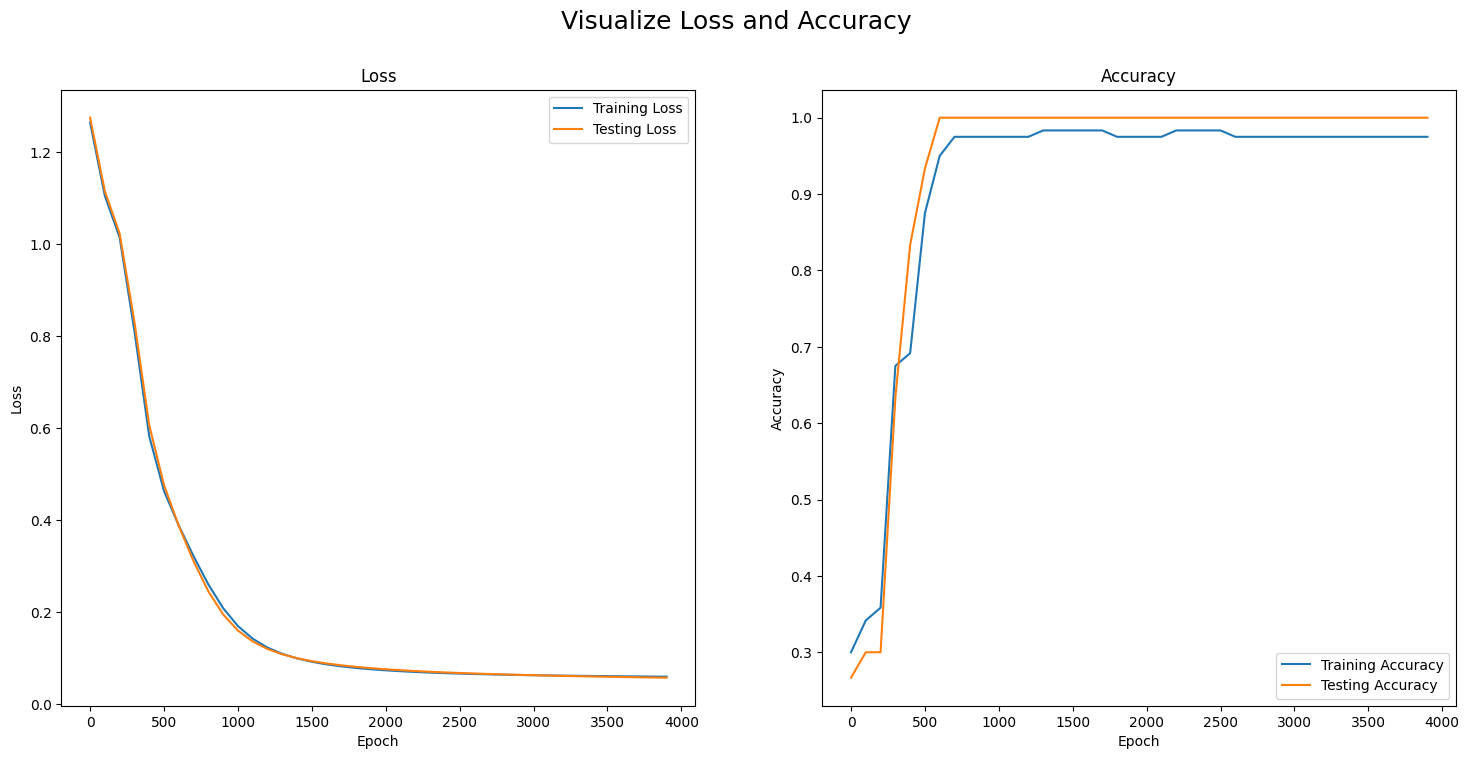

In [11]:
plt.figure(figsize=(18,8))
plt.suptitle("Visualize Loss and Accuracy", fontsize=18)

plt.subplot(1,2,1)
plt.plot(epoch_list,loss_train_list,label="Training Loss")
plt.plot(epoch_list,loss_test_list,label="Testing Loss")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epoch_list,acc_train_list,label="Training Accuracy")
plt.plot(epoch_list,acc_test_list,label="Testing Accuracy")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

In [12]:
from pathlib import Path 

MODEL = Path("model")
MODEL.mkdir(parents=True,exist_ok=True)
MODEL_NAME= "iris_multi_classification_model.pth"
MODEL_PATH = MODEL / MODEL_NAME

torch.save(obj=model.state_dict(),f=MODEL_PATH)